In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [10]:
new_data = pd.read_csv('Downloads/data_updated.csv')

In [11]:
new_data.shape

(456, 11)

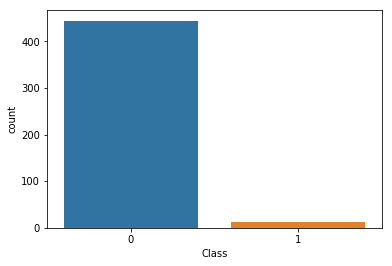

In [12]:
sns.countplot(new_data['Class'])

In [6]:
def data_check(df, column_list):
    for col in column_list:
        df.drop(col, axis=1, inplace=True)
    df.dropna(inplace=True)
    cols_to_process = []
    for indx, dt in enumerate(df.dtypes):
        if dt != int:
            cols_to_process.append(df.dtypes.index[indx])
    for col in cols_to_process:
        print col
        invalid_inputs = set()
        for val in df[col]:
            try:
                int(val)
            except:
                invalid_inputs.add(val)
        print 'invalid input: {}'.format(invalid_inputs)       
        for iv in invalid_inputs:
            df = df[df[col] != iv]
        df[col] = df[col].astype(int)
        
    return df           

In [13]:
new_data.head()

,Unnamed: 0,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,5,1,1,1,2,1,3,1,1,0
1,1,5,4,4,5,7,10,3,2,1,0
2,2,3,1,1,1,2,2,3,1,1,0
3,3,6,8,8,1,3,4,3,7,1,0
4,4,4,1,1,3,2,1,3,1,1,0


In [9]:
#new_data = data_check(new_data, ['Sample code number'])

/Users/anushabimal/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/anushabimal/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/anushabimal/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/anushabimal/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


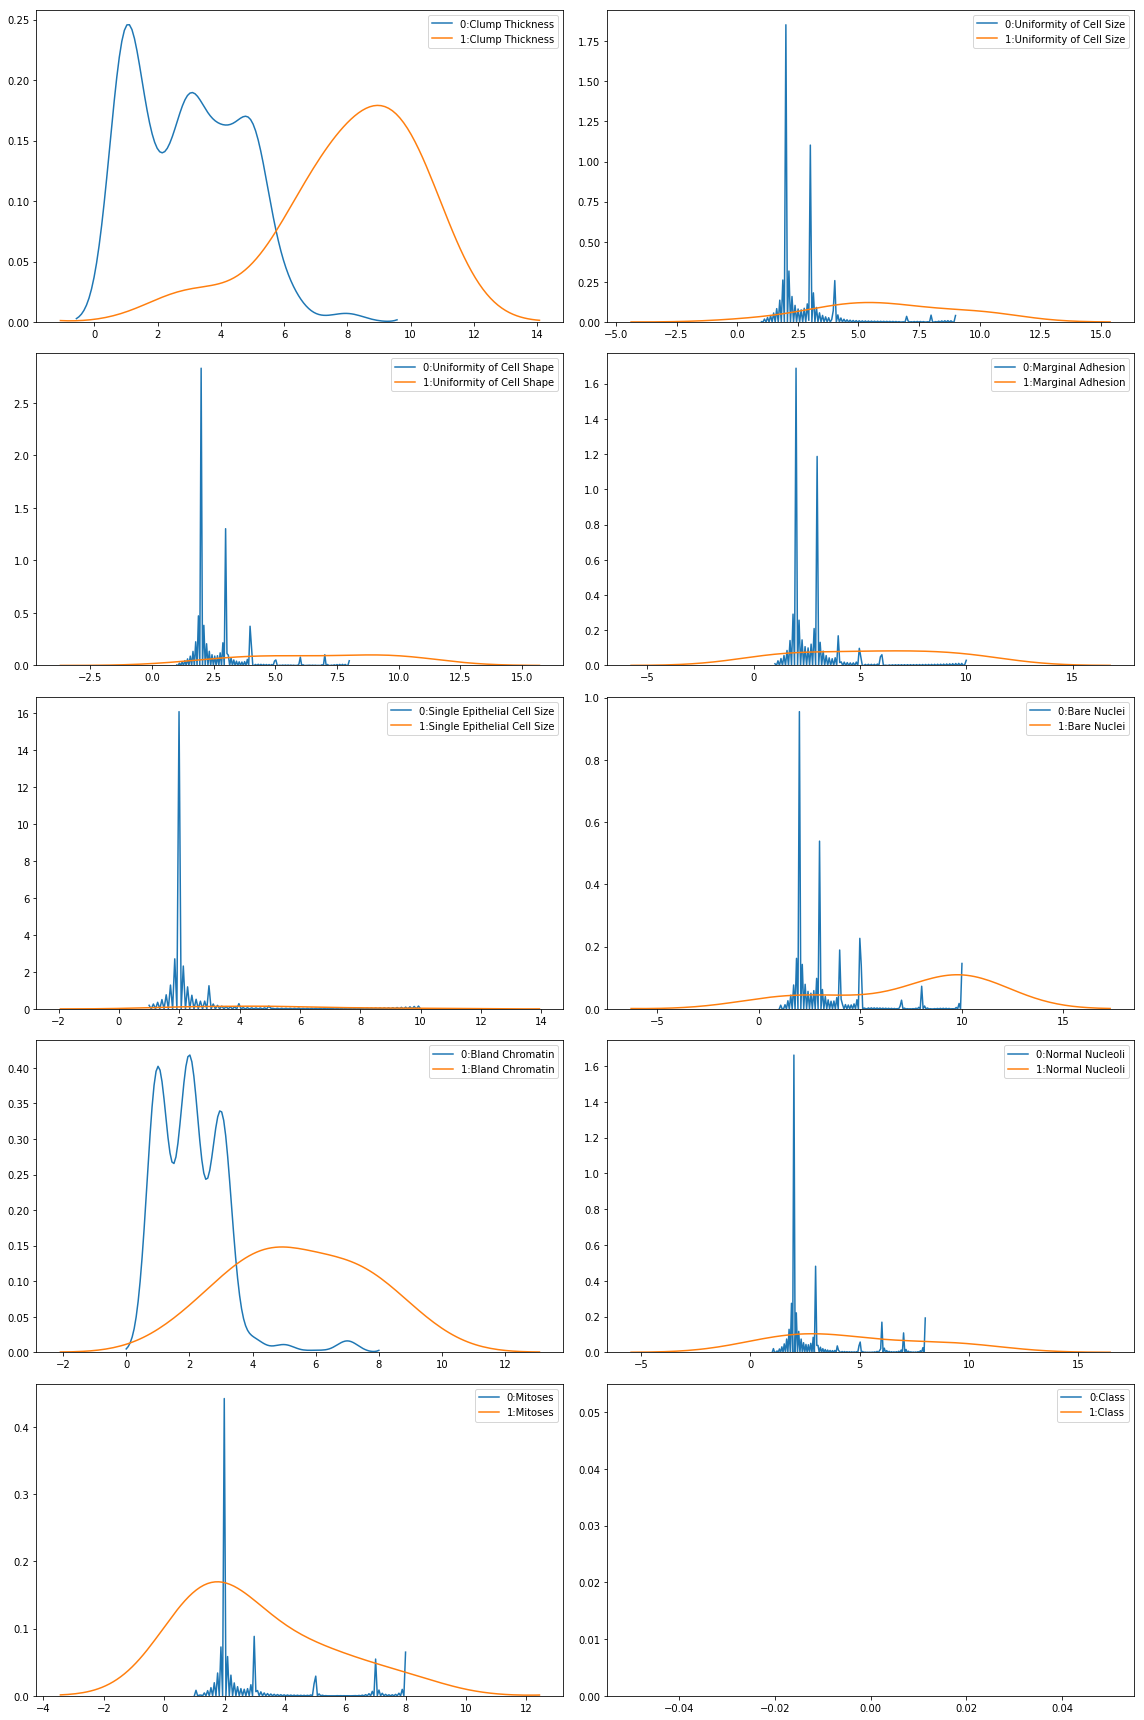

In [14]:
ccols = new_data.columns[1:]
grouped_data = new_data.groupby('Class')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 24), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), ccols):
    for k, v in grouped_data[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name)

In [15]:
def metrics(true, preds):
    accuracy = accuracy_score(true, preds)
    recall = recall_score(true, preds)
    precision = precision_score(true, preds)
    
    print 'accuracy: {}, recall: {}, precision: {}'.format(accuracy, recall, precision)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(new_data.drop('Class', axis=1), new_data['Class'], test_size = 0.3)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
preds = rf.predict(x_test)
metrics(y_test, preds)

accuracy: 0.978102189781, recall: 0.0, precision: 0.0


/Users/anushabimal/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
y_train = y_train.reshape(-1)
y_train_malignant_indices = np.where(y_train == 1)[0]
sample_indices = np.random.choice(y_train_malignant_indices, 300, replace=True)

/Users/anushabimal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [25]:
y_train_sampled = y_train[sample_indices]

In [26]:
oversampled_data = x_train.iloc[sample_indices]
oversampled_data.shape
x_train = pd.concat([x_train, oversampled_data])
print x_train.shape
y_train_sampled = y_train[sample_indices]
y_train = np.append(y_train, y_train_sampled, axis=0)
print y_train.shape

(619, 10)
(619,)


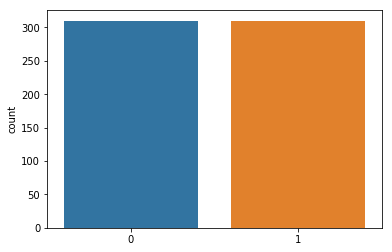

In [27]:
sns.countplot(y_train)

In [28]:
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)
kf.get_n_splits(x_train)
KFold(n_splits=5, random_state=None, shuffle=True)

/Users/anushabimal/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KFold(n_splits=5, random_state=None, shuffle=True)

In [60]:
for train_index, test_index in kf.split(x_train):
    train, test = x_train.iloc[train_index], x_train.iloc[test_index]
    target_train, target_test = y_train[train_index], y_train[test_index]

In [29]:
rf = RandomForestClassifier()

In [30]:
scores = cross_val_score(rf, x_train, y_train, scoring='recall', cv=5)
print scores

[ 1.  1.  1.  1.  1.]


In [31]:
preds = cross_val_predict(rf, x_train, y_train, cv=5)
print recall_score(y_train, preds)
print accuracy_score(y_train, preds)
print precision_score(y_train, preds)

1.0
1.0
1.0


In [34]:
rf.fit(x_train, y_train)
test_preds = rf.predict(x_test)
print recall_score(y_test, test_preds)
print accuracy_score(y_test, test_preds)
print precision_score(y_test, test_preds)

0.0
0.963503649635
0.0
